In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
import glob

seaborn.set_theme(rc={'figure.figsize':(11.7,8.27)})

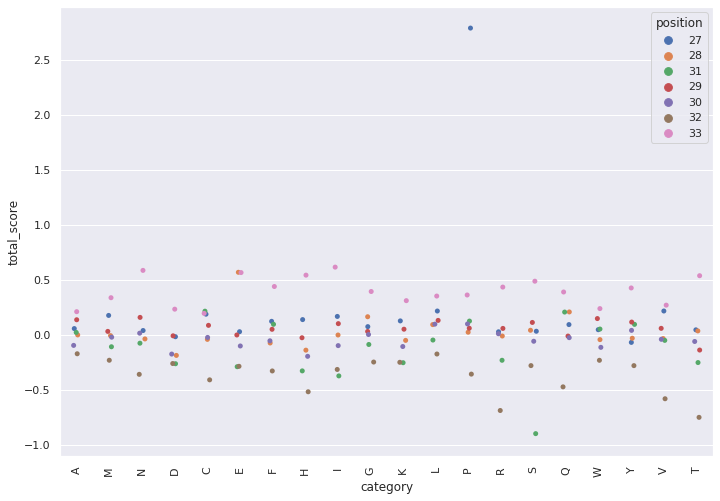

In [7]:
for folder in glob.glob('MVTS_*')[:7]:
    result = pd.read_csv(folder+'/analysis_output/output_saturation-results.csv')
    result = result[result['scored_state']=='ddG']
    result = result[result['score_function_name'] == 'fa_talaris2014-gam']
    last_result = result[result['nstruct'] >= 30]

    aas = last_result.apply(lambda x: str(x.copy()['case_name'][-1]), axis=1)

    last_result = last_result.assign(category=aas.values)
    average_by_mutation = last_result.groupby('case_name').mean()
    average_by_mutation = average_by_mutation.assign(category=aas.unique())
    average_by_mutation = average_by_mutation.assign(position=folder[-2:])
    last_result = last_result.assign(position=int(folder[-2:]))

    if folder == 'MVTS_27':
        results = average_by_mutation.copy()
        last_results = last_result.copy()
    else:
        results = results.append(average_by_mutation)
        last_results = last_results.append(last_result)
    
seaborn.stripplot(data=results, x='category', y='total_score', hue='position', jitter=True)

plt.tick_params(axis='x', rotation=90)

In [32]:
narrow_results = last_results[(last_results['position'] == 29) | (last_results['position'] == 31) | (last_results['position'] == 32)]

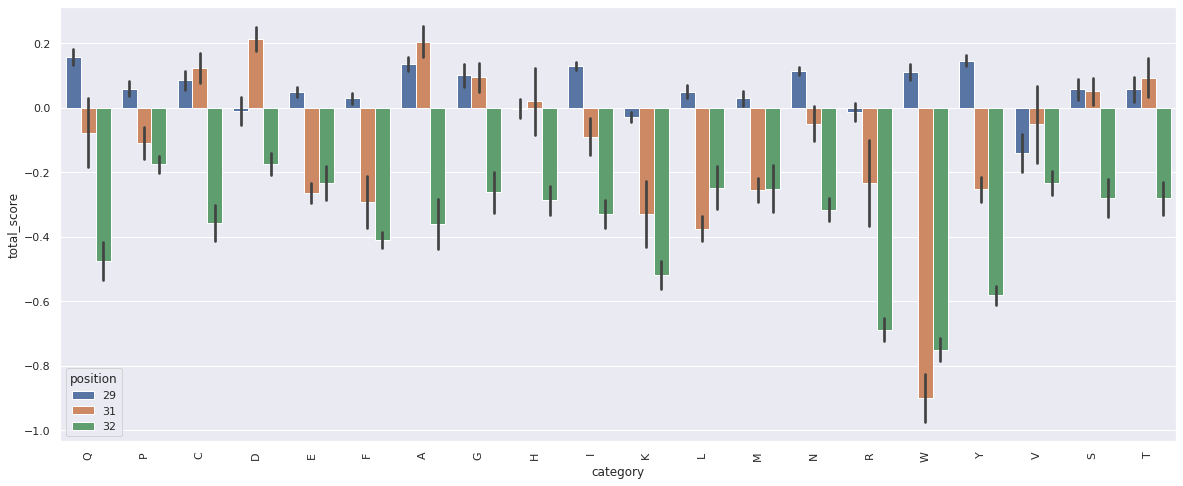

In [33]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=narrow_results, x='category', y='total_score', hue='position', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

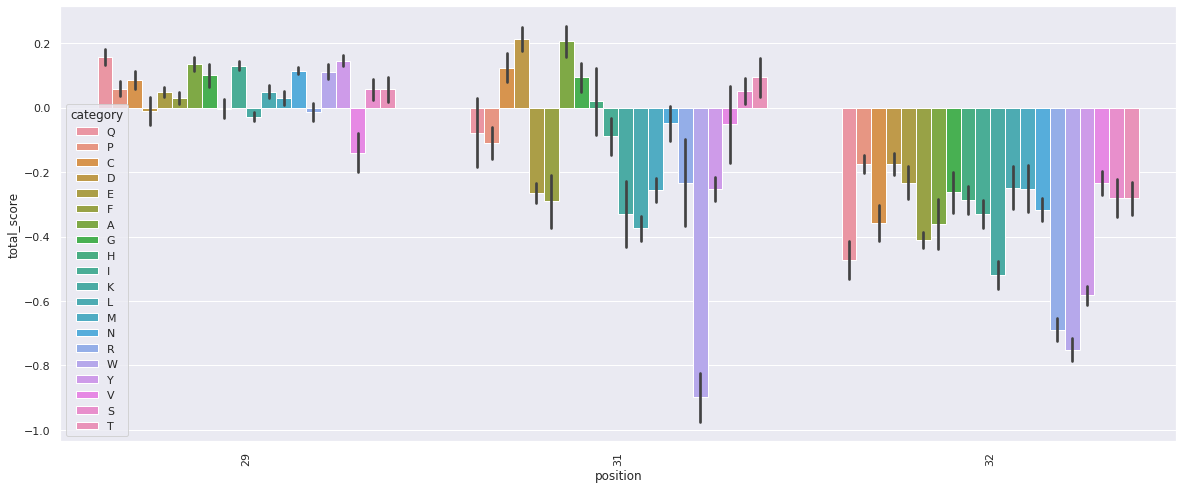

In [34]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=narrow_results, x='position', y='total_score', hue='category', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

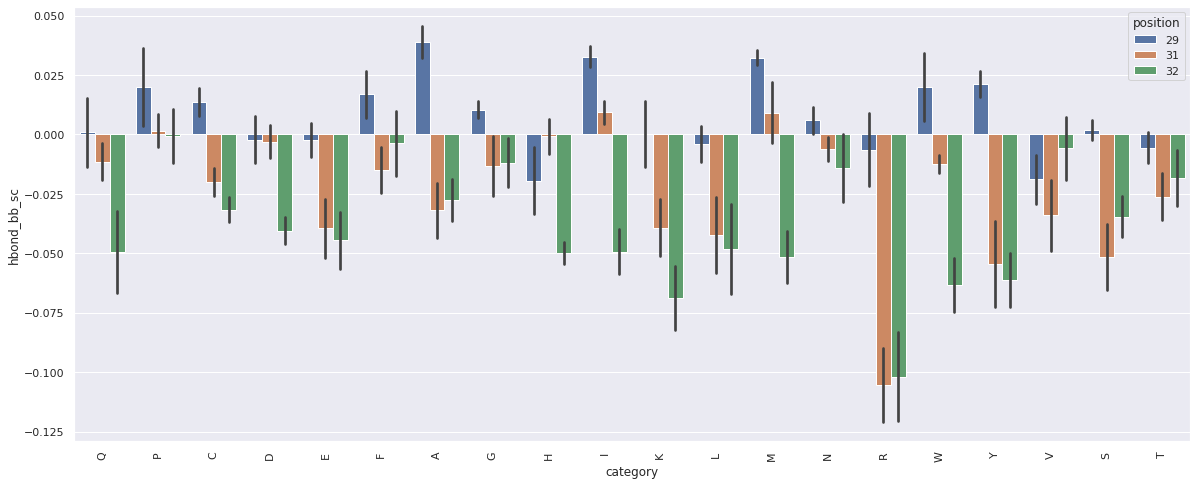

In [35]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=narrow_results, x='category', y='hbond_bb_sc', hue='position', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

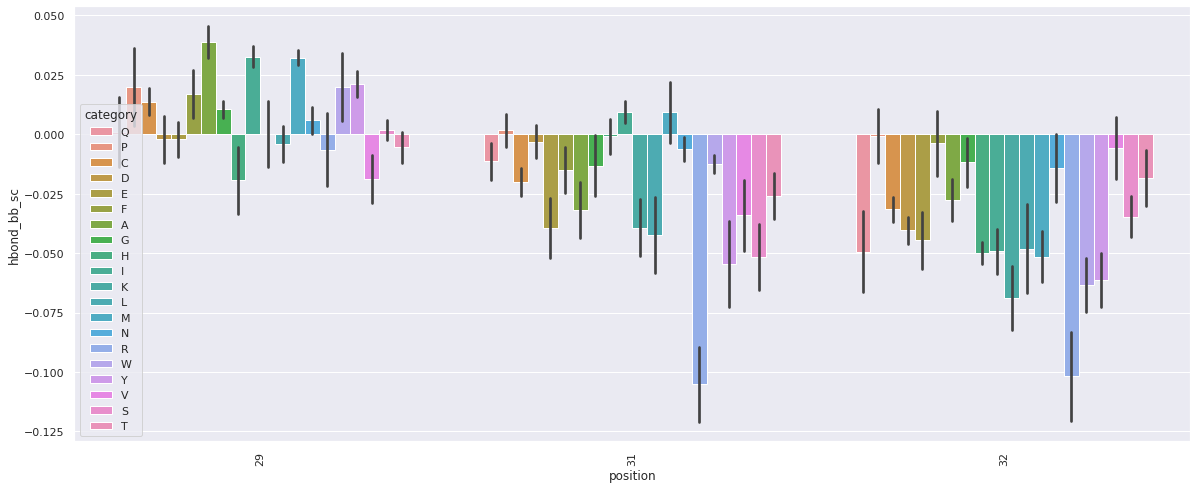

In [36]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=narrow_results, x='position', y='hbond_bb_sc', hue='category', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

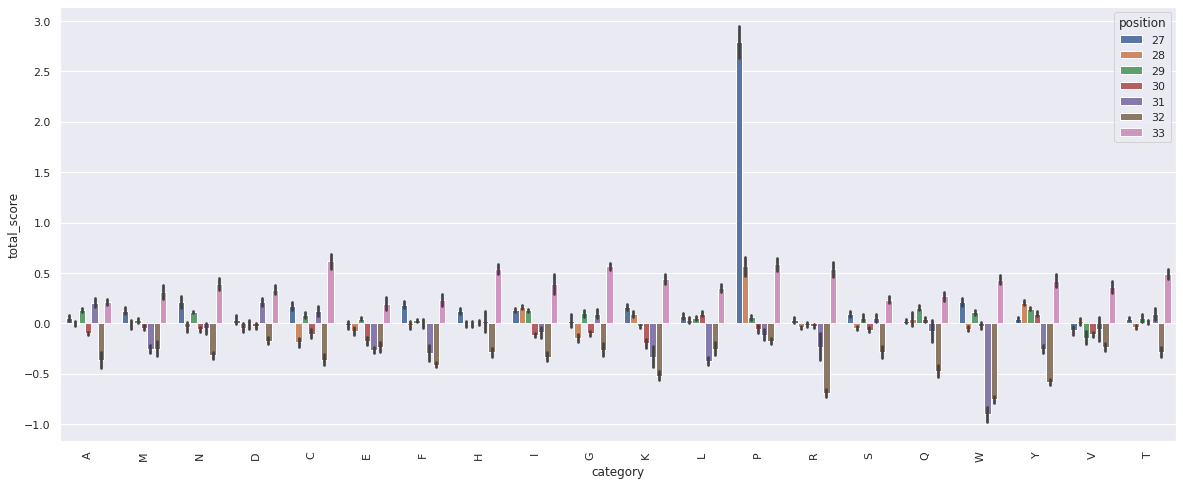

In [14]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=last_results, x='category', y='total_score', hue='position', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

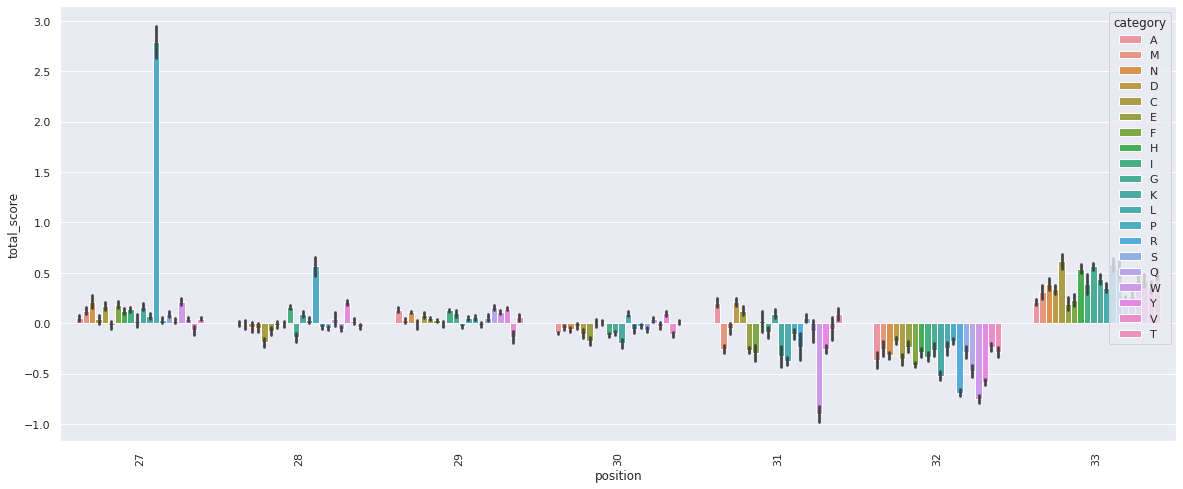

In [15]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=last_results, x='position', y='total_score', hue='category', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

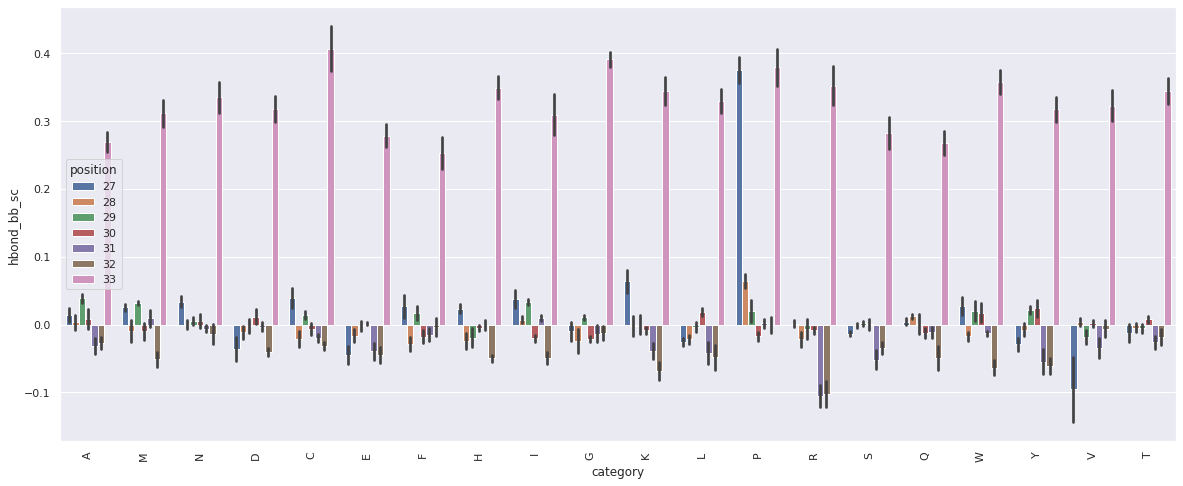

In [16]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=last_results, x='category', y='hbond_bb_sc', hue='position', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)

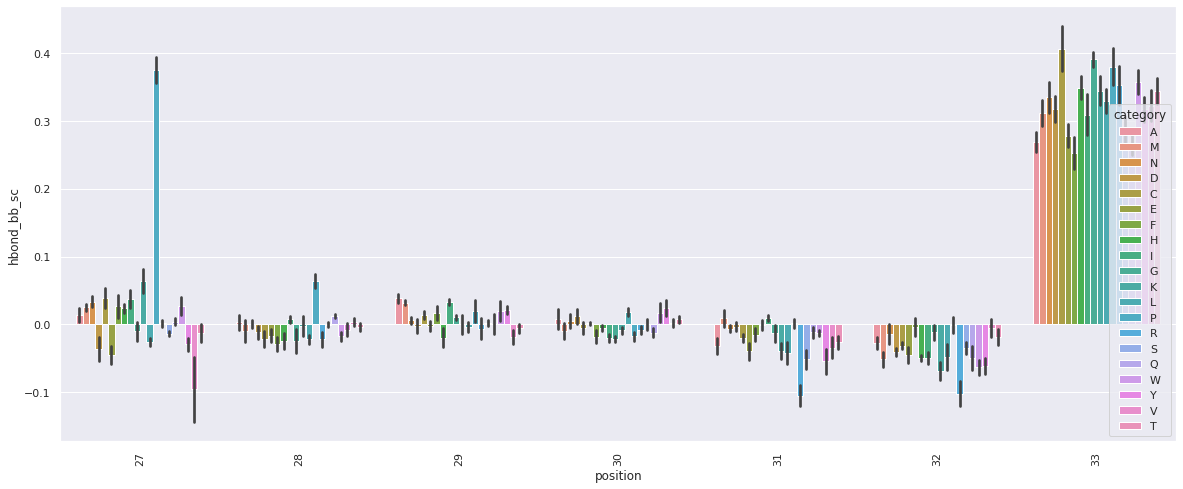

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
seaborn.barplot(data=last_results, x='position', y='hbond_bb_sc', hue='category', ci="sd", ax=ax)
ax.tick_params(axis='x', rotation=90)